# Introducción a Data Mining

El Data Mining tambien conocido como minería de datos, el es proceso de extracción de patrones, conocimientos y correlaciones útiles a partir de grandes volúmenes de datos.

Esto se logra mediante la aplicación de técnicas de análisis de datos y algoritmos de aprendizaje automático.

### Conceptos Básicos a tener en cuenta:
Dataset: Conjunto de datos recolectados y organizados para su análisis.

Atributos: Características o variables que describen los objetos del dataset.

Registro: Un conjunto de atributos que describen a un objeto en el dataset.

Clasificacion: Asignación de objetos a clases predefinidas en función de sus atributos.

Regresión: Predicción de un valor numérico en función de los atributos de un objeto.

Agrupamiento : División de los objetos en grupos según sus atributos, de manera que los objetos en un grupo sean similares entre sí y diferentes a los objetos en otros grupos.

CRISP-DM define un ciclo de vida enfocado a la exploración y análisis de los datos. Este ciclo de vida consta de 6 fases: Comprensión del negocio, Comprensión de los datos, Preparación de los datos, Modelado, Evaluación y Despliegue. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

Importamos PCA. En el dataframe que importaremos tiene 4 dimensiones más una categorica q es la etiqueta que de alguna manera queremos predecir. No podemos hacer una gráfica de 4 dim, sino que máximo se puede hacer de 3 dim. PCA permite proyectar los datos en dimensiones mas bajas, en dos o tres y observar como estan distribuidos los datos.

In [3]:
df= sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
pca_model = PCA(n_components=2)
df_pca = pca_model.fit_transform(df.iloc[:,:-1]) #metodo que entrena el modelo pca y regresa los valores transformados.
df_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

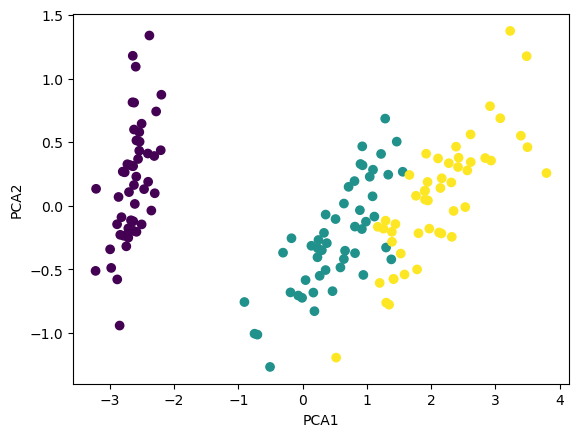

In [8]:
# Visualización del resultado
plt.scatter(df_pca[:,0],df_pca[:,1], c= df['species'].astype('category').cat.codes)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

En el gráfico anterior podemos ver que no solo proyectamos los puntos sino que estamos visualizando cada grupo. Aqui se observa como pasamos de 4 dim a 2 dim y podemos visualizar cada gruppo con un diferente color en 2 dim

Otra Técnica de procesamiento de datos es la transformación de variables. Veremos un ejemplo de Transformación logaritmica.

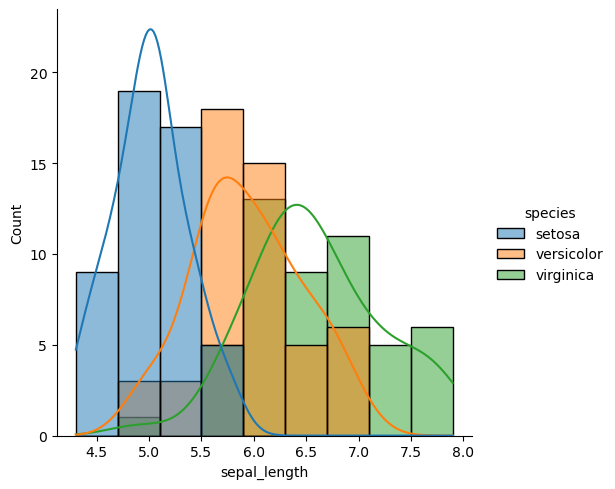

In [10]:
sns.displot(data=df, x='sepal_length', hue='species',kde=True)
plt.show()

Observamos la distribución del sepal_length para cada especie, pero las versicolor y las virginica estan muy mezcladas, las colas no se diferencian y estan muy juntas.
COn la transformación logaritmica intentaremos separar las clases.

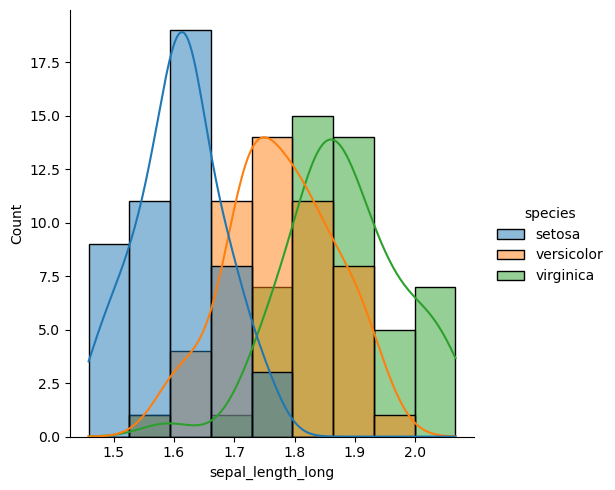

In [11]:
# Transformación logaritmica
df['sepal_length_long'] = np.log(df['sepal_length'])

sns.displot(data=df, x='sepal_length_long', hue='species', kde=True)
plt.show()

### Técnica de Normalización de Datos

Escalado y Normalización de Datos
El modelo se entrena para reconocer una distribución y no números reales. El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1]. La normalización va a transformar las características de forma que todas compartan un mismo valor medio y una misma desviación media, por ejemplo.

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_long
0,5.1,3.5,1.4,0.2,setosa,1.629241
1,4.9,3.0,1.4,0.2,setosa,1.589235
2,4.7,3.2,1.3,0.2,setosa,1.547563
3,4.6,3.1,1.5,0.2,setosa,1.526056
4,5.0,3.6,1.4,0.2,setosa,1.609438
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.902108
146,6.3,2.5,5.0,1.9,virginica,1.840550
147,6.5,3.0,5.2,2.0,virginica,1.871802
148,6.2,3.4,5.4,2.3,virginica,1.824549


In [15]:
std_scaler = StandardScaler()
df_std_scaler = std_scaler.fit_transform(df.iloc[:,:-2])
df_std_scaler

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
mm_scaler=MinMaxScaler()
df_normalized = mm_scaler.fit_transform(df.iloc[:,:-2])
df_normalized

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### Técnica de Correlación (Pearson)

El coeficiente de correlación de Pearson es una prueba que mide la relación estadística entre dos variables continuas. Si la asociación entre los elementos no es lineal, entonces el coeficiente no se encuentra representado adecuadamente. El coeficiente de correlación puede tomar un rango de valores de +1 a -1.

In [18]:
from scipy.stats import pearsonr

In [20]:
# Calcular la correlacion de pearson
correlacion,_= pearsonr(df['sepal_length'],df['petal_length'])

print(f'La correlación de pearson entre sepal length y petal length es: {correlacion}')

La correlación de pearson entre sepal length y petal length es: 0.8717537758865832


### Técnica Analisis de Clusters

Los algoritmos de clustering se utilizan para agrupar una base de datos de clientes en distintos segmentos con características, intereses o comportamientos similares, de manera que se les pueda ofrecer productos y servicios personalizados según sus necesidades e intereses.

In [21]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters=3, random_state=42) # debemos conocer nuestros datos. en num de cluster es = al número de clases q tenemos que es = al Número de flores que tenemos.
df['cluster'] = model.fit_predict(df.iloc[:,:-2])
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_long,cluster
0,5.1,3.5,1.4,0.2,setosa,1.629241,1
1,4.9,3.0,1.4,0.2,setosa,1.589235,1
2,4.7,3.2,1.3,0.2,setosa,1.547563,1
3,4.6,3.1,1.5,0.2,setosa,1.526056,1
4,5.0,3.6,1.4,0.2,setosa,1.609438,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.902108,2
146,6.3,2.5,5.0,1.9,virginica,1.840550,0
147,6.5,3.0,5.2,2.0,virginica,1.871802,2
148,6.2,3.4,5.4,2.3,virginica,1.824549,2


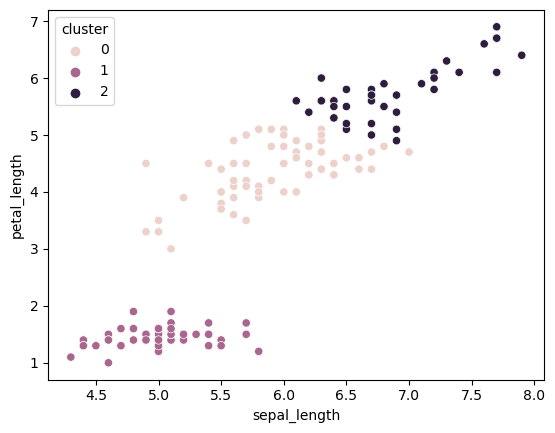

In [23]:
# ejercicio sólo para ver la técnica. el modelo cluster contiene errores
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='cluster')
plt.show()

### Técnica Z-Score
La metodología Z-score resulta muy útil a la hora de evitar el problema de los valores atípicos en los datos. Con este método, si un valor es igual a la media de todos los valores presentes, se normalizará a 0. Si está por debajo del valor medio, se considerará un número negativo, y si está por encima del valor medio será un número positivo.



In [26]:
# Calcular el Z-score
df['z-score_sepal_lenght']= np.abs((df['sepal_length'] - df['sepal_length'].mean()) / df['sepal_length'].std())
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_long,cluster,z-score_sepal_lenght
0,5.1,3.5,1.4,0.2,setosa,1.629241,1,0.897674
1,4.9,3.0,1.4,0.2,setosa,1.589235,1,1.139200
2,4.7,3.2,1.3,0.2,setosa,1.547563,1,1.380727
3,4.6,3.1,1.5,0.2,setosa,1.526056,1,1.501490
4,5.0,3.6,1.4,0.2,setosa,1.609438,1,1.018437
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.902108,2,1.034539
146,6.3,2.5,5.0,1.9,virginica,1.840550,0,0.551486
147,6.5,3.0,5.2,2.0,virginica,1.871802,2,0.793012
148,6.2,3.4,5.4,2.3,virginica,1.824549,2,0.430722


In [27]:
outliers = df[df['z-score_sepal_lenght'] > 2]
outliers

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_long,cluster,z-score_sepal_lenght
105,7.6,3.0,6.6,2.1,virginica,2.028148,2,2.121409
117,7.7,3.8,6.7,2.2,virginica,2.041220,2,2.242172
118,7.7,2.6,6.9,2.3,virginica,2.041220,2,2.242172
122,7.7,2.8,6.7,2.0,virginica,2.041220,2,2.242172
131,7.9,3.8,6.4,2.0,virginica,2.066863,2,2.483699
135,7.7,3.0,6.1,2.3,virginica,2.041220,2,2.242172


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

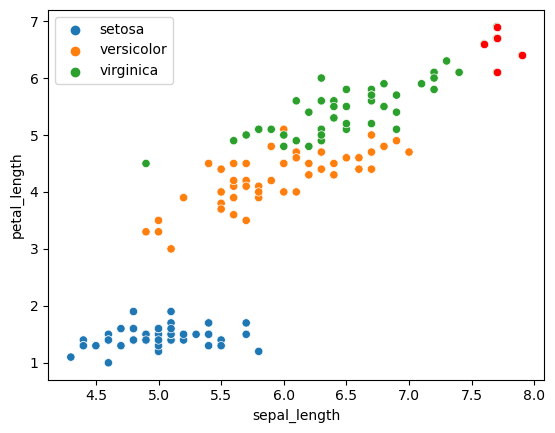

In [32]:
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')
sns.scatterplot(data=outliers, x='sepal_length', y='petal_length', color = 'red')